# Scikit-learn Demo

### Dependencies

In [1]:
%matplotlib inline

from pathlib import Path
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.metrics import classification_report_imbalanced

### Linear Regression

In [2]:
# Data
df = pd.read_csv(Path('data/Salary_Data.csv'))
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


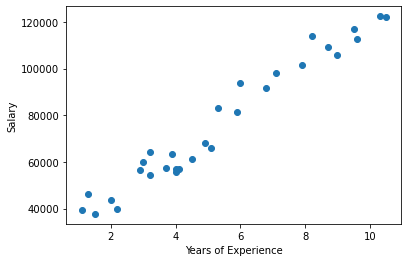

In [3]:
# Plot data
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [4]:
# Split data into features and target
X = df.drop('Salary', axis=1)
y = df['Salary']
X.shape, y.shape

((30, 1), (30,))

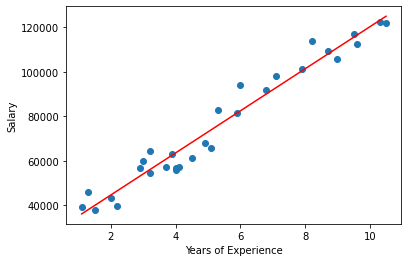

In [5]:
# Linear regression
lr = LinearRegression()
lr.fit(X, y) # train model
y_pred = lr.predict(X) # make predictions

# Plot line over points
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(X, y_pred, c='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Logistic Regression

In [6]:
# Data
df = pd.read_csv(Path('data/diabetes.csv'))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Feature/target split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [8]:
# Logistic regression
lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7142857142857143

### Support Vector Machines

In [9]:
# Data
df = pd.read_csv(Path('data/loans.csv'))
df.head()

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve


In [10]:
# Feature/target split
X = df.drop('status', axis=1)
y = df['status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5), (20, 5), (80,), (20,))

In [11]:
# SVM classifer
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Evaluate model
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

     approve       0.40      0.44      0.42         9
        deny       0.50      0.45      0.48        11

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



array([[4, 5],
       [6, 5]])

In [12]:
# Compare to logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate model
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

     approve       0.38      0.33      0.35         9
        deny       0.50      0.55      0.52        11

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20



array([[3, 6],
       [5, 6]])

### Preprocessing

In [13]:
# Data
df = pd.read_csv(Path('data/loans_data.csv'))
df.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,High School or Below,male,0
1,1000,30,July,50,Bachelor,female,0
2,1000,30,August,33,Bachelor,female,0
3,1000,15,September,27,college,male,0
4,1000,30,October,28,college,female,0


In [14]:
# Numerically encode `gender`
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

# One-hot encode `education`
df = pd.get_dummies(df, columns=['education'])
df.head()

,amount,term,month,age,gender,bad,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,June,45,1,0,0,1,0,0
1,1000,30,July,50,0,0,1,0,0,0
2,1000,30,August,33,0,0,1,0,0,0
3,1000,15,September,27,1,0,0,0,0,1
4,1000,30,October,28,0,0,0,0,0,1


In [15]:
# Create numerical mapping for `month`
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
mapping = dict(zip(months, range(1, 13)))

# Numerically encode `month`
df['month'] = df['month'].map(mapping)
df.head()

,amount,term,month,age,gender,bad,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,6,45,1,0,0,1,0,0
1,1000,30,7,50,0,0,1,0,0,0
2,1000,30,8,33,0,0,1,0,0,0
3,1000,15,9,27,1,0,0,0,0,1
4,1000,30,10,28,0,0,0,0,0,1


In [16]:
# Feature/target split
X = df.drop('bad', axis=1)
y = df['bad']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 9), (100, 9), (400,), (100,))

In [17]:
# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,amount,term,month,age,gender,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,0.463507,0.890619,-1.671437,-0.979483,0.390817,-0.377964,1.16316,-0.100504,-0.886405
1,0.463507,0.890619,0.107476,0.022119,-2.558744,-0.377964,1.16316,-0.100504,-0.886405
2,0.463507,0.890619,0.403961,0.856787,-2.558744,-0.377964,1.16316,-0.100504,-0.886405
3,0.463507,0.890619,0.996932,0.355986,0.390817,-0.377964,1.16316,-0.100504,-0.886405
4,0.463507,-0.978466,-1.078466,-1.480284,0.390817,-0.377964,1.16316,-0.100504,-0.886405


### Decision Tree

In [18]:
# Decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = tree.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        60
           1       0.40      0.40      0.40        40

    accuracy                           0.52       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.52      0.52      0.52       100



,Predicted 0,Predicted 1
0,36,24
1,24,16


In [19]:
# Logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

              precision    recall  f1-score   support

           0       0.59      0.93      0.72        60
           1       0.20      0.03      0.04        40

    accuracy                           0.57       100
   macro avg       0.39      0.48      0.38       100
weighted avg       0.43      0.57      0.45       100



,Predicted 0,Predicted 1
0,56,4
1,39,1


### Random Forest

In [20]:
# Random forest
forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        60
           1       0.48      0.40      0.44        40

    accuracy                           0.59       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.58      0.59      0.58       100



,Predicted 0,Predicted 1
0,43,17
1,24,16


In [21]:
# Feature importances
sorted(zip(forest.feature_importances_, X_train.columns), reverse=True)

[(0.44110147328868005, 'age'),
 (0.31317503602293356, 'month'),
 (0.07915617476402229, 'term'),
 (0.049380443616854126, 'amount'),
 (0.04432062730031928, 'gender'),
 (0.025205873749645696, 'education_college'),
 (0.024826782819188178, 'education_High School or Below'),
 (0.020004418016703062, 'education_Bachelor'),
 (0.002829170421653861, 'education_Master or Above')]

### Gradient Boosting

In [22]:
# Find optimal learning rate
for learning_rate in [0.05, 0.1, 0.25, 0.5, 0.75, 1]:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, 
                                    max_features=5, max_depth=3, random_state=42)
    gb.fit(X_train_scaled, y_train)
    
    print('Learning rate:', learning_rate)
    print('Training accuracy:', gb.score(X_train_scaled, y_train))
    print('Test accuracy:', gb.score(X_test_scaled, y_test))
    print()

Learning rate: 0.05
Training accuracy: 0.675
Test accuracy: 0.58

Learning rate: 0.1
Training accuracy: 0.745
Test accuracy: 0.6

Learning rate: 0.25
Training accuracy: 0.825
Test accuracy: 0.63

Learning rate: 0.5
Training accuracy: 0.885
Test accuracy: 0.58

Learning rate: 0.75
Training accuracy: 0.8925
Test accuracy: 0.58

Learning rate: 1
Training accuracy: 0.9375
Test accuracy: 0.55



In [23]:
# Gradient boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, 
                                    max_features=5, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = gb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

              precision    recall  f1-score   support

           0       0.66      0.78      0.72        60
           1       0.55      0.40      0.46        40

    accuracy                           0.63       100
   macro avg       0.61      0.59      0.59       100
weighted avg       0.62      0.63      0.62       100



,Predicted 0,Predicted 1
0,47,13
1,24,16


### Oversampling

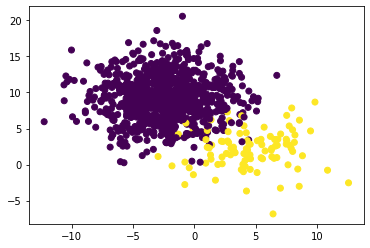

In [24]:
# Create data with class imbalance
X, y = make_blobs(n_samples=[900, 100], random_state=42, cluster_std=3)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [25]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
Counter(y_train), Counter(y_test) # confirm class imbalance

(Counter({0: 675, 1: 75}), Counter({0: 225, 1: 25}))

In [26]:
# Logistic regression on original data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       0.96      0.96      0.96        25

    accuracy                           0.99       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250



,Predicted 0,Predicted 1
0,224,1
1,1,24


In [27]:
# Random oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({0: 675, 1: 675})

In [28]:
# Logistic regression on randomly oversampled data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      1.00      0.99      0.99      0.97       225
          1       0.81      1.00      0.97      0.89      0.99      0.98        25

avg / total       0.98      0.98      1.00      0.98      0.99      0.97       250



,Predicted 0,Predicted 1
0,219,6
1,0,25


In [29]:
# Synthetic minority oversampling technique
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
Counter(y_train_smote)

Counter({0: 675, 1: 675})

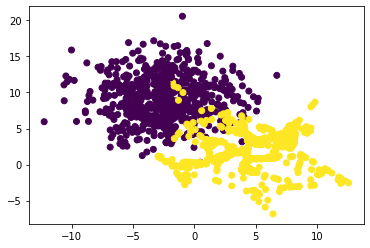

In [30]:
# Plot data
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote)
plt.show()

In [31]:
# Logistic regression on smote data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)

y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98       225
          1       0.86      1.00      0.98      0.93      0.99      0.98        25

avg / total       0.99      0.98      1.00      0.98      0.99      0.98       250



,Predicted 0,Predicted 1
0,221,4
1,0,25


### Undersampling

In [32]:
# Data
df = pd.read_csv(Path('data/cc_default.csv'))
df.head()

,ID,ln_balance_limit,sex,education,marriage,age,default_next_month
0,1,9.903488,1,2,0,24,1
1,2,11.695247,1,2,1,26,1
2,3,11.407565,1,2,1,34,0
3,4,10.819778,1,2,0,37,0
4,5,10.819778,0,2,0,57,0


In [33]:
# Feature/target split
X = df.drop(['ID', 'default_next_month'], axis=1)
y = df['default_next_month']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 5), (7500, 5), (22500,), (7500,))

In [34]:
# Logistic regression on original data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.44      0.00      0.01      1659

    accuracy                           0.78      7500
   macro avg       0.61      0.50      0.44      7500
weighted avg       0.70      0.78      0.68      7500



,Predicted 0,Predicted 1
0,5832,9
1,1652,7


In [35]:
# Random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({0: 4977, 1: 4977})

In [36]:
# Logistic regression on randomly undersampled data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.63      0.54      0.71      0.58      0.34      5841
          1       0.29      0.54      0.63      0.38      0.58      0.34      1659

avg / total       0.71      0.61      0.56      0.64      0.58      0.34      7500



,Predicted 0,Predicted 1
0,3654,2187
1,761,898


In [37]:
# Cluster centroid undersampling
cc = ClusterCentroids(random_state=42)
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)
print(Counter(y_train_cc))

Counter({0: 4977, 1: 4977})


In [38]:
# Logistic regression on cluster centroid data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_cc, y_train_cc)

y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.51      0.57      0.63      0.54      0.29      5841
          1       0.25      0.57      0.51      0.35      0.54      0.30      1659

avg / total       0.69      0.53      0.56      0.57      0.54      0.29      7500



,Predicted 0,Predicted 1
0,2997,2844
1,708,951


### Combination sampling

In [39]:
# SMOTE + ENN (edited nearest neighbors)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
Counter(y_train_smoteenn)

Counter({0: 7715, 1: 5787})

In [40]:
# Logistic regression on smoteenn data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smoteenn, y_train_smoteenn)

y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(2), columns=['Predicted 0', 'Predicted 1'])

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.70      0.46      0.75      0.56      0.33      5841
          1       0.30      0.46      0.70      0.36      0.56      0.31      1659

avg / total       0.70      0.64      0.51      0.67      0.56      0.32      7500



,Predicted 0,Predicted 1
0,4067,1774
1,899,760


### SMOTE vs SMOTEENN

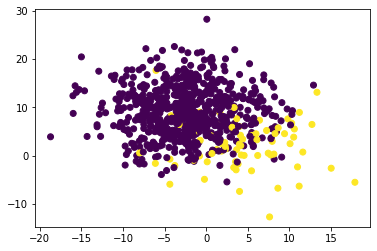

In [41]:
# Create data with class imbalance
X, y = make_blobs(n_samples=[900, 100], random_state=42, cluster_std=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Plot data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

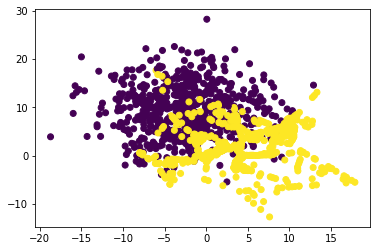

In [42]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot data
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote)
plt.show()

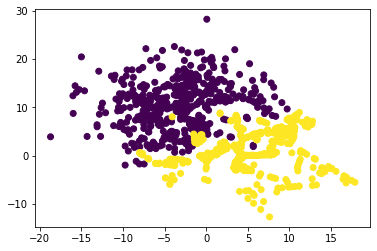

In [43]:
# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Plot data
plt.scatter(X_train_smoteenn[:, 0], X_train_smoteenn[:, 1], c=y_train_smoteenn)
plt.show()